# Credit Card Fraud Detection

Imports

In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting options
%matplotlib inline
mpl.style.use('ggplot')
sns.set(style='whitegrid')

Read in the data into a pandas dataframe.

In [45]:
df = pd.read_csv('creditcard.csv')

In [5]:
df.shape

(284807, 31)

In [7]:
df.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
102869,68405.0,1.209026,-0.258138,-0.148610,0.094773,1.426285,3.973773,-1.306023,1.094696,0.501152,...,0.201002,0.485349,-0.106204,1.012410,0.523160,-0.223792,0.077587,0.037555,10.96,0
148803,90219.0,1.981580,-0.425274,-0.075723,0.714019,-0.871791,-0.505054,-0.838757,-0.049205,2.725764,...,0.003208,0.434481,0.197704,-0.047736,-0.359050,0.536943,-0.050148,-0.056219,9.19,0
98764,66807.0,1.283267,0.339900,0.154221,0.609343,-0.205264,-0.870362,0.070586,-0.174452,0.073572,...,-0.313029,-0.904495,0.086989,-0.017929,0.260762,0.117169,-0.024080,0.026789,0.89,0
227623,145146.0,2.052398,-0.130794,-1.248260,0.191040,0.125372,-0.622048,0.056221,-0.144401,0.349256,...,-0.271396,-0.693213,0.271523,-0.498955,-0.272810,0.208745,-0.076713,-0.075404,1.98,0
138472,82665.0,-0.620675,1.013382,1.373037,0.168698,-0.077993,-1.220428,0.689490,-0.126353,-0.323538,...,-0.237532,-0.624818,0.177414,0.654109,-0.183016,0.045304,0.131843,0.082653,8.38,0
3299,2846.0,1.233084,0.373278,0.445418,0.768739,-0.517563,-1.256164,0.104029,-0.233175,-0.012273,...,-0.264364,-0.757897,0.167680,0.675560,0.177552,0.073693,-0.021715,0.034479,1.98,0
202966,134581.0,1.879244,0.063670,-1.907810,1.324628,0.482491,-1.389191,0.928118,-0.529182,-0.141881,...,0.182684,0.429527,-0.088257,-0.012506,0.418847,-0.490828,-0.047648,-0.047801,99.00,0
129114,78957.0,1.436700,-1.195571,0.502531,-1.376942,-1.647344,-0.709039,-1.070097,-0.125478,-1.615716,...,-0.372139,-0.858441,0.102387,-0.036961,0.138898,-0.390765,0.029173,0.032920,60.00,0
107047,70257.0,-2.311677,-0.290415,1.604746,3.112319,-0.159493,1.641988,0.917884,0.362325,-0.964000,...,-0.311453,-0.249356,0.499980,-0.293727,0.170575,0.184091,0.419611,0.463940,303.50,0
214049,139511.0,-0.524705,0.944096,1.273794,0.103998,0.716361,-0.407044,0.973493,-0.267477,-0.496448,...,-0.111776,-0.122055,-0.293143,1.038105,0.364488,0.620927,-0.148991,-0.123673,28.03,0


In [46]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [47]:
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

Only 0.17% (492 out of 284,807) transactions are fraudulent.

**Train/Test Split**

Before we begin preprocessing, we split off a test data set. First split the data into features and response variable:

In [52]:
X = df.drop(labels='Class', axis=1) # Features
y = df.loc[:,'Class']               # Response

We'll use a test size of 30%. We also stratify the split on the response variable, which is very important to do because there are so few fraudulent transactions.

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [55]:
X_train.shape

(199364, 30)

In [56]:
X_test.shape

(85443, 30)

First we need to figure out if variables have any dependency between them.
We will find Mutual Information between Fraud and the Predictors.
We learn from sklearn guide that Mutual Information methods can capture any kind of statistical dependency. 
We have enough training samples to make it work, so we use mutual_info_classif method to find for our case.
Mutual information of 0 indicates no dependence, and higher values indicate higher dependence. 

In [14]:
from sklearn.feature_selection import mutual_info_classif
mutual_infos = pd.Series(data=mutual_info_classif(X_train, y_train, discrete_features=False, random_state=1), index=X_train.columns)

The calculated mutual informations of each variable with Class, in descending order:

In [15]:
mutual_infos.sort_values(ascending=False)

V17       0.008037
V14       0.007977
V10       0.007354
V12       0.007354
V11       0.006607
V16       0.005793
V4        0.004843
V3        0.004755
V18       0.004025
V9        0.003996
V7        0.003941
V2        0.003085
V21       0.002304
V27       0.002271
V6        0.002265
V5        0.002254
V1        0.001990
V8        0.001843
V28       0.001757
Time      0.001722
Amount    0.001388
V19       0.001322
V20       0.001136
V23       0.000827
V24       0.000593
V26       0.000459
V22       0.000388
V25       0.000376
V15       0.000230
V13       0.000205
dtype: float64

As you could see above the five most correlated variables with Class are, in decreasing order, V17, V14, V10, V12, and V11.

In [38]:
# Approach to plot confusion matrix (from scikit-learn.org site)
import matplotlib.pyplot as plt
import itertools

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[56780    84]
 [   16    82]]


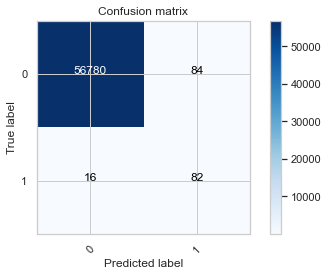

In [39]:
# Confusion matrix on the test dataset
cnf_matrix = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cnf_matrix,classes=[0,1])

**Note:** while 84 regular transactions are wrongly predicted as fraudulent, the model only detects 80% of the fraudulent transactions. As a consequence 16 fraudulent transactions are not detected (False Negatives).

Let's see if we can improve this performance with other machine learning models in the rest of the notebook.

In [40]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, plot_roc_curve
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('accuracy:%0.4f'%acc,'\tprecision:%0.4f'%prec,'\trecall:%0.4f'%rec,'\tF1-score:%0.4f'%f1)

accuracy:0.9982 	precision:0.4940 	recall:0.8367 	F1-score:0.6212


**Data Modeling**

At this point we're ready to build machine learning models to predict whether a transaction is fraudulent.

We'll train the following models:

**-Logistic regression**

**-Support vector classifier**

**-Random forest**

**-Decision trees**

**Logistic Regression and Support Vector Classifier**

The class SGDClassifier implements multiple linear classifiers with SGD training, which makes learning much faster on large datasets. We'll implement the model as a machine learning pipeline that includes StandardScaler for data standardization (rescaling each variable to zero mean and unit variance).

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

In [17]:
pipeline_sgd = Pipeline([
    ('scaler', StandardScaler(copy=False)),
    ('model', SGDClassifier(max_iter=1000, tol=1e-3, random_state=1, warm_start=True))
])

We'll conduct a grid search over several hyperparameter choices. The search uses 5-fold cross-validation with stratified folds.

The type of linear classifier is chosen with the loss hyperparameter.

For a linear SVC we set loss = 'hinge', and for logistic regression we set loss = 'log'.

Set the hyperparameter grids to search over, one grid for the linear SVC and one for logistic regression:

In [19]:
param_grid_sgd = [{
    'model__loss': ['log'],
    'model__penalty': ['l1', 'l2'],
    'model__alpha': np.logspace(start=-3, stop=3, num=20)
}, {
    'model__loss': ['hinge'],
    'model__alpha': np.logspace(start=-3, stop=3, num=20),
    'model__class_weight': [None, 'balanced']
}]

The grid search, implemented by GridSearchCV, uses StratifiedKFold with 5 folds for the train/validation splits.
We'll use matthews_corrcoef (the Matthews correlation coefficient, MCC) as our scoring metric.

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, matthews_corrcoef


MCC_scorer = make_scorer(matthews_corrcoef)
grid_sgd = GridSearchCV(estimator=pipeline_sgd, param_grid=param_grid_sgd, scoring=MCC_scorer, 
                        n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)

Now Perform the grid search

In [21]:
import warnings
with warnings.catch_warnings(): # Suppress warnings from the matthews_corrcoef function
    warnings.simplefilter("ignore")
    grid_sgd.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


Mean cross-validated MCC score of the best estimator found:

In [22]:
grid_sgd.best_score_

0.8064954203007113

This is a pretty good MCC score---random guessing has a score of 0, and a perfect predictor has a score of 1. 

Now check the best hyperparameters found in the grid search:

In [23]:
grid_sgd.best_params_

{'model__alpha': 483.2930238571752,
 'model__class_weight': 'balanced',
 'model__loss': 'hinge'}

NOTE: The linear SVC performed better than logistic regression, and with a high level of regularization ($\alpha\approx 483$)

**Random Forest:**
    
    Next we'll try a random forest model, implemented in RandomForestClassifier.

In [24]:
from sklearn.ensemble import RandomForestClassifier

We do not need to rescale the data for tree-based models, so our pipeline will simply consist of the random forest model. 

We'll leave the pipeline implementation in place in case we want to add preprocessing steps in the future.

In [25]:
pipeline_rf = Pipeline([
    ('model', RandomForestClassifier(n_jobs=-1, random_state=1))
])

The random forest takes much longer to train on this fairly large dataset, 
so we don't actually do a hyperparameter grid search, only specifiying the number of estimators. 

We'll leave the grid search implemented in case we decide to try different hyperparameter values in the future.

In [26]:
param_grid_rf = {'model__n_estimators': [75]}

grid_rf = GridSearchCV(estimator=pipeline_rf, param_grid=param_grid_rf, scoring=MCC_scorer, 
                       n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)

Now We Perform the grid search:

In [27]:
grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=1))]),
             n_jobs=-1, param_grid={'model__n_estimators': [75]},
             scoring=make_scorer(matthews_corrcoef), verbose=1)

In [28]:
grid_rf.best_score_

0.8596447282953857

Note: The random forest performed much better than the linear SVC---and without any hyperparameter tweaking!

In [29]:
grid_rf.best_params_

{'model__n_estimators': 75}

**Decision trees:**

In [35]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

In [36]:
decision_tree.fit(X_train,y_train.values.ravel())

DecisionTreeClassifier()

In [41]:
y_pred = decision_tree.predict(X_test)

In [42]:
decision_tree.score(X_test,y_test)

0.9982444436641972

Confusion matrix, without normalization
[[56780    84]
 [   16    82]]


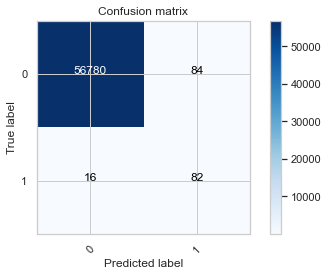

In [43]:
# Confusion matrix on the test dataset
cnf_matrix = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cnf_matrix,classes=[0,1])

**Test Set Evaluation of the Best Model**

According to the cross-validated MCC scores, the random forest is the best-performing model, 

so now let's evaluate its performance on the test set.

In [32]:
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score

In [33]:
def classification_eval(estimator, X_test, y_test):
    """
    Print several metrics of classification performance of an estimator, given features X_test and true labels y_test.
    
    Input: estimator or GridSearchCV instance, X_test, y_test
    Returns: text printout of metrics
    """
    y_pred = estimator.predict(X_test)
    
    # Number of decimal places based on number of samples
    dec = np.int64(np.ceil(np.log10(len(y_test))))
    
    print('CONFUSION MATRIX')
    print(confusion_matrix(y_test, y_pred), '\n')
    
    print('CLASSIFICATION REPORT')
    print(classification_report(y_test, y_pred, digits=dec))
    
    print('SCALAR METRICS')
    format_str = '%%13s = %%.%if' % dec
    print(format_str % ('MCC', matthews_corrcoef(y_test, y_pred)))
    if y_test.nunique() <= 2: # Additional metrics for binary classification
        try:
            y_score = estimator.predict_proba(X_test)[:,1]
        except:
            y_score = estimator.decision_function(X_test)
        print(format_str % ('AUPRC', average_precision_score(y_test, y_score)))
        print(format_str % ('AUROC', roc_auc_score(y_test, y_score)))
    print(format_str % ("Cohen's kappa", cohen_kappa_score(y_test, y_pred)))
    print(format_str % ('Accuracy', accuracy_score(y_test, y_pred)))

Evaluate the random forest on the test set:

In [34]:
classification_eval(grid_rf, X_test, y_test)

CONFUSION MATRIX
[[56853    11]
 [   15    83]] 

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0    0.99974   0.99981   0.99977     56864
           1    0.88298   0.84694   0.86458        98

    accuracy                        0.99954     56962
   macro avg    0.94136   0.92337   0.93218     56962
weighted avg    0.99954   0.99954   0.99954     56962

SCALAR METRICS
          MCC = 0.86454
        AUPRC = 0.85159
        AUROC = 0.95916
Cohen's kappa = 0.86435
     Accuracy = 0.99954


**Note:** According to the MCC, the random forest performed better on the test set than on the training set. 

This is probably due to the refit model being trained on the entire training data set, and not on the smaller CV folds.

**Conclusion:**

We were able to accurately identify fraudulent credit card transactions using a random forest model.

We found that the five variables most correlated with fraud are, in decreasing order, V17, V14, V10, V12, and V11.

Only a few preprocessing steps were necessary before constructing predictive models:

-Split the data using a random, stratified train/test split with a test size of 20%

-Box-Cox power transform of the transaction amounts to remove skewness in the data

-Mean and variance standardization of all features as part of a machine learning pipeline

We used the Matthews correlation coefficient (MCC) to compare the performance of different models. 

In cross validation, the best linear model (logistic regression, linear SVC) achieved a cross-validated MCC score of 0.807, 

and a random forest achieved a cross-validated MCC score of 0.856. We therefore chose the random forest as the better model,

which obtained an MCC of 0.869 on the test set.

To improve a chosen model, we searched over a grid of hyperparameters and compared performance with cross-validation. 